# Intialize notebook

In [118]:
import os
import time
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from functools import reduce

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
%matplotlib inline

from tqdm import tqdm
import pickle

import sys
sys.path.insert(1, './python_files/yolo_load_files')
from predictor import get_estimations

In [99]:
pd.set_option('display.max_columns', None)

In [3]:
# Constants
#KITTI_DATASET = '/media/javier/HDD_linux/KITTI_dataset/training/'
KITTI_DATASET = '/media/robesafe/SSD_SATA/KITTI_DATASET/'
WORK_PATH = os.getcwd()
WEIGHTS_PATH = os.getcwd()+'/weights'

# Run YOLOv5

In [4]:
yolo_estimations = get_estimations(KITTI_DATASET, WORK_PATH, WEIGHTS_PATH, batch_size=400, threshold=0.5)

Using cache found in /home/robesafe/Javier/3D-detection-system-lidar-camera/ultralytics_yolov5_master
YOLOv5 🚀 3f28eb5 torch 1.10.2 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11175.375MB)

Fusing layers... 
Model Summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


Using previous model KITTI_100_YOLO5l.pkl
Batch: 0 (0.0%)


/home/robesafe/anaconda3/envs/javi_tfm/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811805959/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Yolo_time (avg sec per image): 0.016091514825820923
Batch: 1 (5.346878759524127%)
Yolo_time (avg sec per image): 0.015445442795753479
Batch: 2 (10.693757519048255%)
Yolo_time (avg sec per image): 0.015243232250213623
Batch: 3 (16.040636278572382%)
Yolo_time (avg sec per image): 0.015107998847961426
Batch: 4 (21.38751503809651%)
Yolo_time (avg sec per image): 0.015272619128227234
Batch: 5 (26.73439379762064%)
Yolo_time (avg sec per image): 0.015313474535942078
Batch: 6 (32.081272557144764%)
Yolo_time (avg sec per image): 0.015385648608207703
Batch: 7 (37.428151316668895%)
Yolo_time (avg sec per image): 0.01524639070034027
Batch: 8 (42.77503007619302%)
Yolo_time (avg sec per image): 0.015179577469825744
Batch: 9 (48.12190883571715%)
Yolo_time (avg sec per image): 0.015304890871047973
Batch: 10 (53.46878759524128%)
Yolo_time (avg sec per image): 0.01557531237602234
Batch: 11 (58.815666354765405%)
Yolo_time (avg sec per image): 0.01559471309185028
Batch: 12 (64.16254511428953%)
Yolo_time (

In [5]:
yolo_estimations

[[[(711, 149), (804, 303), 'person', 0.93115234375],
  [(371, 206), (420, 274), 'bicycle', 0.640625],
  [(337, 207), (382, 280), 'bicycle', 0.59619140625],
  [(911, 195), (962, 277), 'bicycle', 0.56005859375],
  [(250, 212), (330, 283), 'bicycle', 0.50341796875]],
 [[(388, 179), (422, 198), 'car', 0.7431640625]],
 [[(658, 189), (702, 221), 'car', 0.56591796875]],
 [[(614, 184), (722, 282), 'car', 0.8857421875],
  [(0, 232), (210, 371), 'car', 0.80078125]],
 [[(281, 184), (342, 211), 'car', 0.8466796875],
  [(366, 181), (403, 203), 'car', 0.77197265625],
  [(403, 171), (436, 191), 'car', 0.54443359375]],
 [[(329, 179), (356, 235), 'person', 0.75634765625]],
 [[(40, 185), (220, 242), 'car', 0.8603515625],
  [(509, 171), (574, 210), 'car', 0.76708984375],
  [(331, 171), (395, 204), 'car', 0.6591796875],
  [(580, 168), (603, 187), 'car', 0.50537109375]],
 [[(564, 174), (613, 223), 'car', 0.767578125],
  [(540, 175), (566, 192), 'car', 0.6962890625],
  [(480, 180), (511, 200), 'car', 0.6865

In [6]:
yolo_detecctions = []
n_image = 0
for image in yolo_estimations:
    n_detecction = 0
    for detecction in image:
        obj_type = None
        if detecction[2] == "car":
            obj_type = "Car"
        elif detecction[2] == "person":
            obj_type = "Pedestrian"
        elif detecction[2] == "bicycle":
            obj_type = "Cyclist"
        else:
            continue
        yolo_detecctions.append([n_image, n_detecction, obj_type, detecction[0][0], detecction[0][1],
                                 detecction[1][0], detecction[1][1], detecction[3]])
        n_detecction += 1
    n_image += 1

In [7]:
df_detections = pd.DataFrame(columns=['frame','id','type','left','top','right','bottom','score'], data=yolo_detecctions)
df_detections

,frame,id,type,left,top,right,bottom,score
0,0,0,Pedestrian,711,149,804,303,0.931152
1,0,1,Cyclist,371,206,420,274,0.640625
2,0,2,Cyclist,337,207,382,280,0.596191
3,0,3,Cyclist,911,195,962,277,0.560059
4,0,4,Cyclist,250,212,330,283,0.503418
...,...,...,...,...,...,...,...,...
36367,7480,9,Car,611,175,643,199,0.622559
36368,7480,10,Car,436,180,494,212,0.588379
36369,7480,11,Car,518,175,545,193,0.555176
36370,7480,12,Car,355,179,468,224,0.542969


In [8]:
def get_bounding_boxes_2D(df, image_id):
    df_frame = df[df['frame'] == image_id]
    bbs = []
    for index, row in df_frame.iterrows():
        bb = (row['left'], row['top'], row['right'], row['bottom'], row['type'])
        bbs.append(bb)
    return bbs

def show_bounding_boxes_2D(df, image_id):
    name = '%06d'%image_id # 6 digit zeropadding
    img = KITTI_DATASET+'images/'+name+'.png'
    
    # do projection staff
    plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
    png = mpimg.imread(img)
    IMG_H,IMG_W,_ = png.shape
    # restrict canvas in range
    plt.axis([0,IMG_W,IMG_H,0])
    plt.imshow(png)
    
    # draw bounding boxes
    bbs = get_bounding_boxes_2D(df, image_id)
    for bb in bbs:
        if bb[4] == 'Car':
            color = 'red'
        elif bb[4] == 'Pedestrian':
            color = 'green'
        elif bb[4] == 'Cyclist':
            color = 'blue'
        else:
            color = 'yellow'
        plt.gca().add_patch(Rectangle((bb[0], bb[1]),bb[2]-bb[0],bb[3]-bb[1],linewidth=1,edgecolor=color,facecolor='none'))
    
    # plt.savefig(WORK_PATH+'/yolo_images/{}.png'.format(name),bbox_inches='tight')
    plt.show()

In [9]:
show_bounding_boxes_2D(df_detections, 30)

/home/robesafe/anaconda3/envs/javi_tfm/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


# Associate GT with YOLOv5 detections

In [10]:
df_gt = pd.read_csv(KITTI_DATASET+'kitti_gt.csv')

In [11]:
df_gt

,frame,id,type,truncated,occluded,...,height_image,width_image,theta_ray,incomplete_2d_horizontal,incomplete_2d_bottom
0,0,0,Pedestrian,0.0,0.0,...,164.92,98.33,0.21,False,False
1,1,0,Car,0.0,0.0,...,21.58,36.18,-0.28,False,False
2,1,1,Cyclist,0.0,3.0,...,29.98,12.38,0.10,False,False
3,2,0,Car,0.0,0.0,...,33.26,42.68,0.09,False,False
4,3,0,Car,0.0,0.0,...,102.99,113.07,0.07,False,False
...,...,...,...,...,...,...,...,...,...,...,...
34851,7480,9,Car,0.0,2.0,...,72.60,167.73,0.29,False,False
34852,7480,10,Car,0.0,1.0,...,44.10,135.03,-0.26,False,False
34853,7480,11,Car,0.0,2.0,...,39.39,112.78,-0.23,False,False
34854,7480,12,Car,0.0,0.0,...,34.52,46.69,0.06,False,False


In [12]:
def bbox_2d_overlap(bbox_gt, bbox_det):
    """
    Calculate the overlap between two bounding boxes in 2D.

    :param bbox_gt: (xmin, ymin, xmax, ymax)
    :param bbox_det: (xmin, ymin, xmax, ymax)
    :return: overlap: float
    """
    # Calculate the area of the bounding boxes
    area_gt = (bbox_gt[2] - bbox_gt[0]) * (bbox_gt[3] - bbox_gt[1])
    area_det = (bbox_det[2] - bbox_det[0]) * (bbox_det[3] - bbox_det[1])
    # Calculate the intersection of the areas
    intersection = bbox_2d_intersection(bbox_gt, bbox_det)
    # Calculate the union of the areas
    union = area_gt + area_det - intersection
    # Calculate the overlap
    overlap = intersection / union
    #print(overlap)
    #print("#################")
    return overlap

def bbox_2d_intersection(bbox_gt, bbox_det):
    """
    Calculate the intersection of two bounding boxes in 2D.

    :param bbox_gt: (xmin, ymin, xmax, ymax)
    :param bbox_det: (xmin, ymin, xmax, ymax)
    :return: intersection: float
    """
    # Calculate the intersection
    intersection = max(0, min(bbox_gt[2], bbox_det[2]) - max(bbox_gt[0], bbox_det[0])) * \
                   max(0, min(bbox_gt[3], bbox_det[3]) - max(bbox_gt[1], bbox_det[1]))
    #print(bbox_gt)
    #print(bbox_det)
    #print(intersection)
    return intersection

In [13]:
combined_list = []

# Get different values of column 'frame' and sort them
frames = df_gt['frame'].unique()
frames.sort()

# Create loading bar
loading_bar = tqdm(total=len(frames))

# Iterate over frames
for frame in frames:
    # Iterate over the df_gt rows with the same 'frame' value
    for index_gt, row_gt in df_gt[df_gt['frame'] == frame].iterrows():
        best_overlap = None
        # Iterate over the df_detections rows with the same 'frame' value and the same 'type' value
        for index_det, row_det in df_detections[(df_detections['frame'] == frame) &
                                                (df_detections['type'] == row_gt['type'])].iterrows():
            # If row_gt['type'] == 'Car'
            if row_gt['type'] == 'Car':
                # If the bounding boxes 2D have an overlap greater than 0.7
                if bbox_2d_overlap((row_gt['left'], row_gt['top'], row_gt['right'], row_gt['bottom']),
                                   (row_det['left'], row_det['top'], row_det['right'], row_det['bottom'])) > 0.7:
                    # Store the best overlaping bounding box
                    best_overlap = row_det
            # If row_gt['type'] == 'Pedestrian' or row_gt['type'] == 'Cyclist'
            else:
                # If the bounding boxes 2D have an overlap greater than 0.5
                if bbox_2d_overlap((row_gt['left'], row_gt['top'], row_gt['right'], row_gt['bottom']),
                                   (row_det['left'], row_det['top'], row_det['right'], row_det['bottom'])) > 0.5:
                    # Store the best overlaping bounding box
                    best_overlap = row_det
        # If best_overlap is None
        if best_overlap is None:
            continue
        # If best_overlap is not None
        else:
            combined_list.append([row_gt['frame'], row_gt['id'], row_gt['type'], row_gt['left'], row_gt['top'],
                                  row_gt['right'], row_gt['bottom'], row_gt['distance'], best_overlap['type'],
                                  best_overlap['left'], best_overlap['top'], best_overlap['right'],
                                  best_overlap['bottom'], best_overlap['score']])
    # Update loading bar
    loading_bar.update(1)

100%|█████████▉| 7475/7481 [01:26<00:00, 85.54it/s] 

In [14]:
df_combined = pd.DataFrame(columns=['frame','id','type_gt','left_gt','top_gt','right_gt',
                                    'bottom_gt','distance_gt','type_yolo','left_yolo',
                                    'top_yolo','right_yolo','bottom_yolo','score_yolo'],
                           data=combined_list)

In [15]:
df_combined

,frame,id,type_gt,left_gt,top_gt,...,left_yolo,top_yolo,right_yolo,bottom_yolo,score_yolo
0,0,0,Pedestrian,712.40,143.00,...,711,149,804,303,0.931152
1,2,0,Car,657.39,190.13,...,658,189,702,221,0.565918
2,3,0,Car,614.24,181.78,...,614,184,722,282,0.885742
3,4,0,Car,280.38,185.10,...,281,184,342,211,0.846680
4,5,0,Pedestrian,330.06,178.74,...,329,179,356,235,0.756348
...,...,...,...,...,...,...,...,...,...,...,...
19839,7480,0,Car,0.00,185.93,...,0,187,209,327,0.926270
19840,7480,4,Car,1094.88,190.09,...,1102,203,1242,369,0.920898
19841,7480,5,Car,934.82,184.38,...,939,190,1179,330,0.922852
19842,7480,10,Car,344.07,180.05,...,355,179,468,224,0.542969


# Evaluate final method using YOLOv5 detections

## Create final model pipeline

In [16]:
def objective_const(x, a):
        return a

def objective_log_f(x, a, b, c):
    return a * np.log(x)**b + c

def objective_2f(x, a, b, c):
        return a * x**2 + b * x + c
    
def objective_3f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def objective_5f(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f
    
def objective_6f(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def objective_7f(x, a, b, c, d, e, f, g, h):
    return a * x**7 + b * x**6 + c * x**5 + d * x**4 + e * x**3 + f * x**2 + g * x + h

def objective_9f(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**9 + b * x**8 + c * x**7 + d * x**6 + e * x**5 + f * x**4 + g * x**3 + h * x**2 + i * x + j

class Regression_model:
    def __init__(self, function, variables):
        self.function = function
        self.variables = variables
    def __str__(self):
        return "function = %s, variables = %s"%(self.function, self.variables)

class Regression_model_class:
    def __init__(self, model_car, model_pedestrian, model_cyclist):
        self.car = model_car
        self.pedestrian = model_pedestrian
        self.cyclist = model_cyclist
    def __str__(self):
        return "car: {%s},\npedestrian: {%s},\ncyclist: {%s}"%(self.car, self.pedestrian, self.cyclist)
        
class Regression_model_bb:
    def __init__(self, bb_complete, bb_incomplete):
        self.bb_complete = bb_complete
        self.bb_incomplete = bb_incomplete
    def __str__(self):
        return "bb_complete: {%s},\nbb_incomplete: {%s}"%(self.bb_complete, self.bb_incomplete)
    
class Regression_model_error:
    def __init__(self, height_distance, height_2d, pointcloud_distance, pointcloud_n_points):
        self.height_distance = height_distance
        self.height_2d = height_2d
        self.pointcloud_distance = pointcloud_distance
        self.pointcloud_n_points = pointcloud_n_points
    def __str__(self):
        return "height_distance: {%s},\nheight_2d: {%s},\npointcloud_distance: {%s},\npointcloud_n_points: {%s}"%\
                                (self.height_distance, self.height_2d, self.pointcloud_distance, self.pointcloud_n_points)

In [17]:
height_model = None
pc_proj_refinement_model = None
error_model = None

with open('height_model.pkl', 'rb') as f:
    height_model = pickle.load(f)
with open('pc_proj_refinement_model.pkl', 'rb') as f:
    pc_proj_refinement_model = pickle.load(f)
with open('error_model.pkl', 'rb') as f:
    error_model = pickle.load(f)
    
distance_models = {'height_model':height_model,
                   'pc_proj_refinement_model':pc_proj_refinement_model,
                   'error_model':error_model}

In [18]:
def approximate_distance_height(type_name, top, bottom, bb_complete, model):
    height = bottom - top
    if type_name == 'Car':
        if bb_complete:
            f = model.car.bb_complete.function
            return f(height, *model.car.bb_complete.variables)
        else:
            f = model.car.bb_incomplete.function
            return f(height, *model.car.bb_incomplete.variables)
    elif type_name == 'Pedestrian':
        f = model.pedestrian.function
        return f(height, *model.pedestrian.variables)
    elif type_name == 'Cyclist':
        f = model.cyclist.function
        return f(height, *model.cyclist.variables)
    else:
        raise ValueError("Type must be Car, Pedestrian or Cyclist")

In [19]:
def get_image(image_id):
    name = '%06d'%image_id # 6 digit zeropadding
    img = KITTI_DATASET+'images/'+name+'.png'
    png = mpimg.imread(img)
    return png

In [20]:
def get_point_cloud_projected(image_id):
    name = '%06d'%image_id # 6 digit zeropadding
    binary = KITTI_DATASET+'velodyne/'+name+'.bin'
    with open(KITTI_DATASET+'calib/'+name+'.txt','r') as f:
        calib = f.readlines()

    # P2 (3 x 4) for left eye (intrinsic matrix in homogeneous coordinates)
    P2 = np.matrix([float(x) for x in calib[2].strip('\n').split(' ')[1:]]).reshape(3,4)
    R0_rect = np.matrix([float(x) for x in calib[4].strip('\n').split(' ')[1:]]).reshape(3,3)
    # Add a 1 in bottom-right, reshape to 4 x 4
    R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
    R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
    Tr_velo_to_cam = np.matrix([float(x) for x in calib[5].strip('\n').split(' ')[1:]]).reshape(3,4)
    Tr_velo_to_cam = np.insert(Tr_velo_to_cam,3,values=[0,0,0,1],axis=0)

    # read raw data from binary
    scan = np.fromfile(binary, dtype=np.float32).reshape((-1,4))
    points = scan[:, 0:3] # lidar xyz (front, left, up)
    # TODO: use fov filter? 
    velo = np.insert(points,3,1,axis=1).T
    velo = np.delete(velo,np.where(velo[0,:]<0),axis=1)
    
    cam = P2 * R0_rect * Tr_velo_to_cam * velo
    cam = np.delete(cam,np.where(cam[2,:]<0)[1],axis=1)
    # get u,v,z
    cam[:2] /= cam[2,:]
    png = get_image(image_id)
    IMG_H,IMG_W,_ = png.shape
    # filter point out of canvas
    u,v,z = cam
    u_out = np.logical_or(u<0, u>IMG_W)
    v_out = np.logical_or(v<0, v>IMG_H)
    outlier = np.logical_or(u_out, v_out)
    cam = np.delete(cam,np.where(outlier),axis=1)
    return cam

In [21]:
def get_projected_pcs_bb(lefts2d, tops2d, rights2d, bottoms2d, projected_pc):
    projected_pcs_bb = []
    for left, top, right, bottom in zip(lefts2d, tops2d, rights2d, bottoms2d):
        filter_bb = (left < projected_pc[0,:]) & (top < projected_pc[1,:]) &\
            (projected_pc[0,:] < right) & (projected_pc[1,:] < bottom)
        pc_distance_bb = projected_pc[2,:][filter_bb]
        # Points on bb
        projected_pcs_bb.append(pc_distance_bb)
        # Deleting saved points
        filter_intersection = (left < projected_pc[0,:]) &\
                       (top < projected_pc[1,:]) &\
                       (projected_pc[0,:] < right) &\
                       (projected_pc[1,:] < bottom)
        projected_pc = np.concatenate((projected_pc[0,:][~filter_intersection],\
                                       projected_pc[1,:][~filter_intersection],\
                                       projected_pc[2,:][~filter_intersection]), axis=0)
    return projected_pcs_bb

In [58]:
def approximate_distance_pc(bbs_complete, tops2d, bottoms2d, types, projected_pcs_bb, model, height_model):
    # Sort bbs by height (change to sort by regression method using height)
    id_bbs = sorted(list(range(len(tops2d))),
                    key=lambda i: approximate_distance_height(types[i], tops2d[i], bottoms2d[i],
                                                              bbs_complete[i], height_model))
    # Create enumare lists
    types = list(enumerate(types))
    tops2d = list(enumerate(tops2d))
    bottoms2d = list(enumerate(bottoms2d))
    # Order using the enumeration
    types.sort(key=lambda x: id_bbs.index(x[0]))
    tops2d.sort(key=lambda x: id_bbs.index(x[0]))
    bottoms2d.sort(key=lambda x: id_bbs.index(x[0]))
    # Save only the intial lists
    types = list(map(lambda x: x[1], types))
    tops2d = list(map(lambda x: x[1], tops2d))
    bottoms2d = list(map(lambda x: x[1], bottoms2d))
        
    # Function to map all bbs
    def get_distances_pc(type_name, top, bottom, pc_distance_bb):
        if pc_distance_bb.size != 0: # Checks if there's any point on the bb 2D
            # Approximate distance
            distance = np.median(np.squeeze(np.asarray(pc_distance_bb)))
            height = bottom - top
            if type_name == 'Car':
                f = model.car.function
                rectification = f(distance, *model.car.variables)
                distance += rectification
            elif type_name == 'Pedestrian':
                f = model.pedestrian.function
                rectification = f(distance, *model.pedestrian.variables)
                distance += rectification
            elif type_name == 'Cyclist':
                f = model.cyclist.function
                rectification = f(distance, *model.cyclist.variables)
                distance += rectification
            else:
                print("Type must be Car, Pedestrian or Cyclist")
            return distance
        else:
            return -1
    # Map over bbs to get distance
    distances = map(lambda type_name, top2d, bottom2d, pc_distance_bb: get_distances_pc(type_name, top2d, bottom2d, pc_distance_bb),
                    types, tops2d, bottoms2d, projected_pcs_bb)
    
    return distances

In [91]:
def ajust_distance(error_model, height_distance, height_2d, pointcloud_distance, pointcloud_n_points, class_name):
    height_distance_model, height_2d_model, pointcloud_distance_model, pointcloud_n_points_model = None, None, None, None
    # Obtain regression models based on the object type
    if class_name == 'Car':
        height_distance_model = error_model.height_distance.car
        height_2d_model = error_model.height_2d.car
        pointcloud_distance_model = error_model.pointcloud_distance.car
        pointcloud_n_points_model = error_model.pointcloud_n_points.car
    elif class_name == 'Cyclist':
        height_distance_model = error_model.height_distance.cyclist
        height_2d_model = error_model.height_2d.cyclist
        pointcloud_distance_model = error_model.pointcloud_distance.cyclist
        pointcloud_n_points_model = error_model.pointcloud_n_points.cyclist
    elif class_name == 'Pedestrian':
        height_distance_model = error_model.height_distance.pedestrian
        height_2d_model = error_model.height_2d.pedestrian
        pointcloud_distance_model = error_model.pointcloud_distance.pedestrian
        pointcloud_n_points_model = error_model.pointcloud_n_points.pedestrian
    else:
        raise ValueError("Type must be Car, Pedestrian or Cyclist")   
    # Obtain an approximate error based on different metrics
    height_distance_error = height_distance_model.function(height_distance, *height_distance_model.variables)
    height_2d_error = height_2d_model.function(height_2d, *height_2d_model.variables)
    pointcloud_distance_error = pointcloud_distance_model.function(pointcloud_distance, *pointcloud_distance_model.variables)
    pointcloud_n_points_error = pointcloud_n_points_model.function(pointcloud_n_points, *pointcloud_n_points_model.variables)
    # Obtain final distance to use
    sum_error = height_distance_error + height_2d_error + pointcloud_distance_error + pointcloud_n_points_error
    distance = (1 - (height_distance_error + height_2d_error)/sum_error) * height_distance +\
               (1 - (pointcloud_distance_error + pointcloud_n_points_error)/sum_error) * pointcloud_distance
    return distance

In [92]:
def approximate_distance(image, pc_projected, types, lefts2d, tops2d, rights2d, bottoms2d, distance_models):
    WIDTH_IMAGE = image.shape[1]
    bbs_complete = list(map(lambda left, right: False if left <= 0 or right >= WIDTH_IMAGE-1 else True,
                       lefts2d, rights2d))
    approx_distances_height = list(map(lambda type_name, top, bottom, bb_complete: approximate_distance_height(type_name, top, bottom, bb_complete, distance_models['height_model']),
                                       types, tops2d, bottoms2d, bbs_complete))
    bbs_pc_n_points = get_projected_pcs_bb(lefts2d, tops2d, rights2d, bottoms2d, pc_projected)
    approx_distances_pc = approximate_distance_pc(bbs_complete, tops2d, bottoms2d, types, bbs_pc_n_points, distance_models['pc_proj_refinement_model'], distance_models['height_model'])
    approx_distances_ensemble = list(map(lambda height_distance, top, bottom, pc_distance, pc_n_points, class_name: ajust_distance(distance_models['error_model'], height_distance, bottom-top, pc_distance, pc_n_points.shape[1], class_name),
                                         approx_distances_height, tops2d, bottoms2d, approx_distances_pc, bbs_pc_n_points, types))
    return approx_distances_ensemble

In [114]:
def approximate_distance_frame(frame, models):
    image = get_image(frame)
    pc_projected = get_point_cloud_projected(frame)
    df_frame = df_combined[df_combined['frame'] == frame]
    types = df_frame['type_yolo'].tolist()
    lefts2d = df_frame['left_yolo'].tolist()
    tops2d = df_frame['top_yolo'].tolist()
    rights2d = df_frame['right_yolo'].tolist()
    bottoms2d = df_frame['bottom_yolo'].tolist()
    distance_models = models
    # Calculate distance approximations
    #start = time.time()
    distance = approximate_distance(image, pc_projected, types, lefts2d, tops2d, rights2d, bottoms2d, distance_models)
    #print(time.time() - start)
    return distance

In [109]:
approximate_distance_frame(7480, distance_models)

0.0017676353454589844


[10.274442494004902,
 8.040818764151691,
 9.877657262272141,
 27.803421277239764,
 34.671502591437594]

In [100]:
df_combined

,frame,id,type_gt,left_gt,top_gt,right_gt,bottom_gt,distance_gt,type_yolo,left_yolo,top_yolo,right_yolo,bottom_yolo,score_yolo
0,0,0,Pedestrian,712.40,143.00,810.73,307.92,8.733533,Pedestrian,711,149,804,303,0.931152
1,2,0,Car,657.39,190.13,700.07,223.39,34.601296,Car,658,189,702,221,0.565918
2,3,0,Car,614.24,181.78,727.31,284.77,13.372767,Car,614,184,722,282,0.885742
3,4,0,Car,280.38,185.10,344.90,215.59,41.416148,Car,281,184,342,211,0.846680
4,5,0,Pedestrian,330.06,178.74,360.77,238.64,24.626313,Pedestrian,329,179,356,235,0.756348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19839,7480,0,Car,0.00,185.93,214.05,348.86,10.618070,Car,0,187,209,327,0.926270
19840,7480,4,Car,1094.88,190.09,1241.00,374.00,8.439579,Car,1102,203,1242,369,0.920898
19841,7480,5,Car,934.82,184.38,1241.00,326.25,10.388547,Car,939,190,1179,330,0.922852
19842,7480,10,Car,344.07,180.05,479.10,224.15,27.044846,Car,355,179,468,224,0.542969


## Execute final model

In [115]:
distance_approx = list(map(lambda x: approximate_distance_frame(x, distance_models), df_combined['frame'].unique().tolist()))

In [116]:
distance_approx

[[9.400300541845294],
 [37.583904703349674],
 [14.183845688698046],
 [43.21269790395142],
 [24.31103882949615],
 [32.28406060021742, 22.869558436672754, 37.408868352483424],
 [26.334640567948455, 55.212252783012346, 65.00627961316174],
 [7.328052877660738,
  8.021827202624623,
  8.330306936765584,
  16.324735332664687,
  34.40976806789004,
  23.224955124569778],
 [25.739870441309733],
 [8.651335346759033,
  13.880974703359579,
  19.548518881231285,
  26.90282360644909,
  42.72741058284084],
 [13.889992389626084,
  13.556250900029758,
  25.684223902536505,
  34.73607060476056,
  20.17207539507454],
 [61.96449346760174],
 [22.368337126316415],
 [7.923584975532655, 8.88567748023047, 28.658484944286574, 26.33998109441262],
 [47.78677104645924, 35.61763102073726, 8.017273275068325],
 [48.74463587766523],
 [46.94256391883544],
 [11.257387962955818, 55.45557902011685],
 [17.425475038517355],
 [15.810068118602976],
 [35.32897159966904],
 [36.258477193072196, 38.19630808018031],
 [10.3551477449

In [121]:
distance_approx = reduce(lambda a, b: a+b, distance_approx)

In [122]:
distance_approx

[9.400300541845294,
 37.583904703349674,
 14.183845688698046,
 43.21269790395142,
 24.31103882949615,
 32.28406060021742,
 22.869558436672754,
 37.408868352483424,
 26.334640567948455,
 55.212252783012346,
 65.00627961316174,
 7.328052877660738,
 8.021827202624623,
 8.330306936765584,
 16.324735332664687,
 34.40976806789004,
 23.224955124569778,
 25.739870441309733,
 8.651335346759033,
 13.880974703359579,
 19.548518881231285,
 26.90282360644909,
 42.72741058284084,
 13.889992389626084,
 13.556250900029758,
 25.684223902536505,
 34.73607060476056,
 20.17207539507454,
 61.96449346760174,
 22.368337126316415,
 7.923584975532655,
 8.88567748023047,
 28.658484944286574,
 26.33998109441262,
 47.78677104645924,
 35.61763102073726,
 8.017273275068325,
 48.74463587766523,
 46.94256391883544,
 11.257387962955818,
 55.45557902011685,
 17.425475038517355,
 15.810068118602976,
 35.32897159966904,
 36.258477193072196,
 38.19630808018031,
 10.355147744986619,
 11.143110321739954,
 29.944519866173223

In [123]:
df_combined['distance_approx'] = distance_approx

In [124]:
df_combined

,frame,id,type_gt,left_gt,top_gt,right_gt,bottom_gt,distance_gt,type_yolo,left_yolo,top_yolo,right_yolo,bottom_yolo,score_yolo,distance_approx
0,0,0,Pedestrian,712.40,143.00,810.73,307.92,8.733533,Pedestrian,711,149,804,303,0.931152,9.400301
1,2,0,Car,657.39,190.13,700.07,223.39,34.601296,Car,658,189,702,221,0.565918,37.583905
2,3,0,Car,614.24,181.78,727.31,284.77,13.372767,Car,614,184,722,282,0.885742,14.183846
3,4,0,Car,280.38,185.10,344.90,215.59,41.416148,Car,281,184,342,211,0.846680,43.212698
4,5,0,Pedestrian,330.06,178.74,360.77,238.64,24.626313,Pedestrian,329,179,356,235,0.756348,24.311039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19839,7480,0,Car,0.00,185.93,214.05,348.86,10.618070,Car,0,187,209,327,0.926270,10.274442
19840,7480,4,Car,1094.88,190.09,1241.00,374.00,8.439579,Car,1102,203,1242,369,0.920898,8.040819
19841,7480,5,Car,934.82,184.38,1241.00,326.25,10.388547,Car,939,190,1179,330,0.922852,9.877657
19842,7480,10,Car,344.07,180.05,479.10,224.15,27.044846,Car,355,179,468,224,0.542969,27.803421


In [128]:
df_combined['distance_error'] = df_combined['distance_approx'] - df_combined['distance_gt']

<AxesSubplot:xlabel='score_yolo', ylabel='distance_error'>

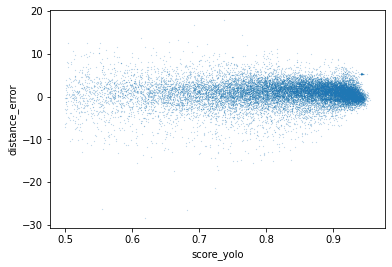

In [140]:
df_combined.plot(x='score_yolo', y='distance_error', kind='scatter', s=0.01)

# MSE of the distance by KITTI difficulties and classes